In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
# %matplotlib inline
%matplotlib notebook

In [70]:
def plot2d(location, temp="450", zmax=20, xlabel="xlabel", ylabel="ylabel", title = ""):
    x = 1
    y = 2
    z = 3
    zmin = 0
    titlefontsize = 28
    filename = location + f"pmf-{temp}.dat"
    data = np.loadtxt(filename)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.figure()
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    # plt.xlim(xmin, xmax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


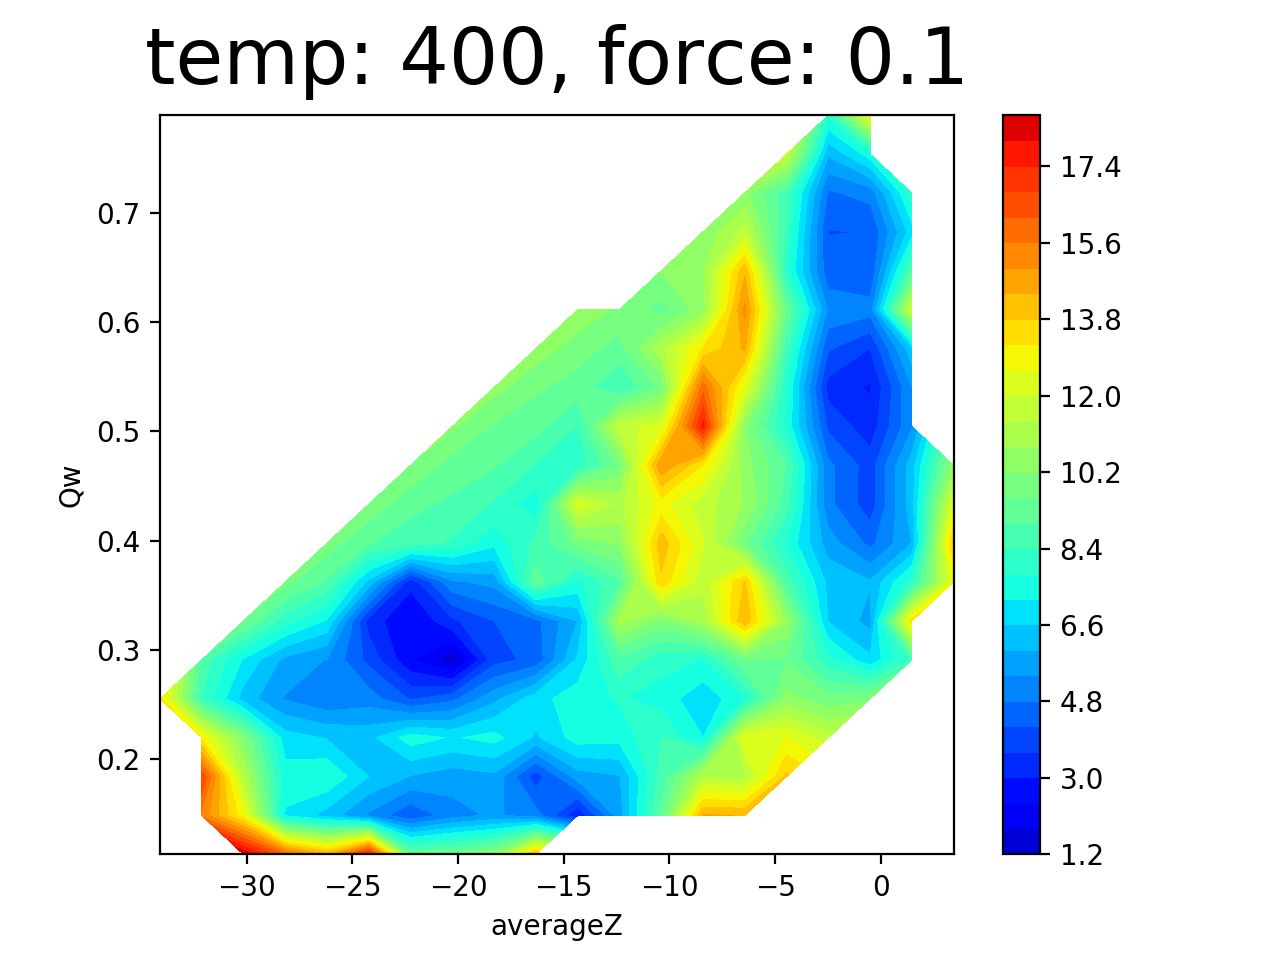

In [49]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


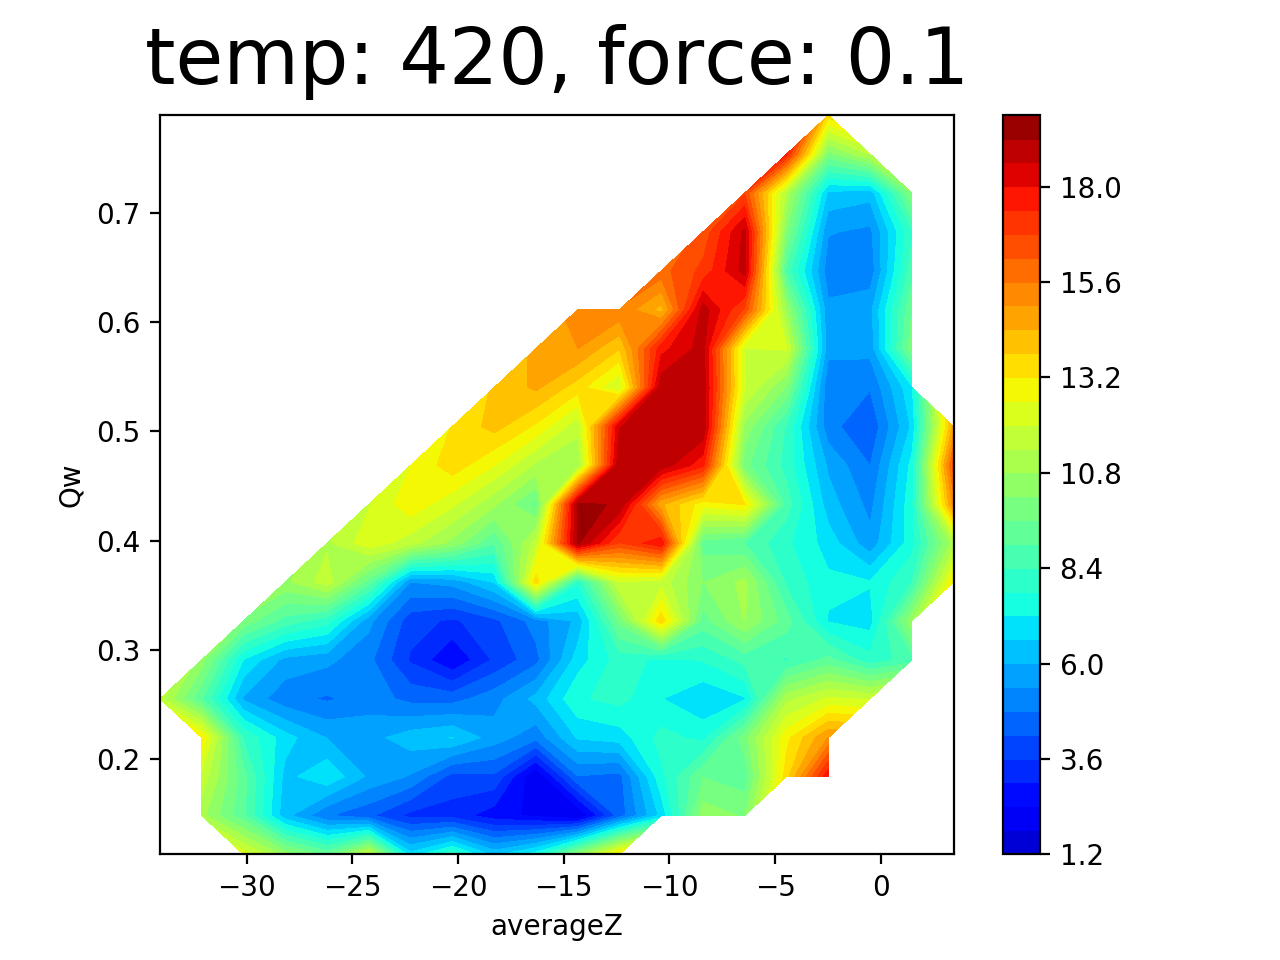

In [50]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 420
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


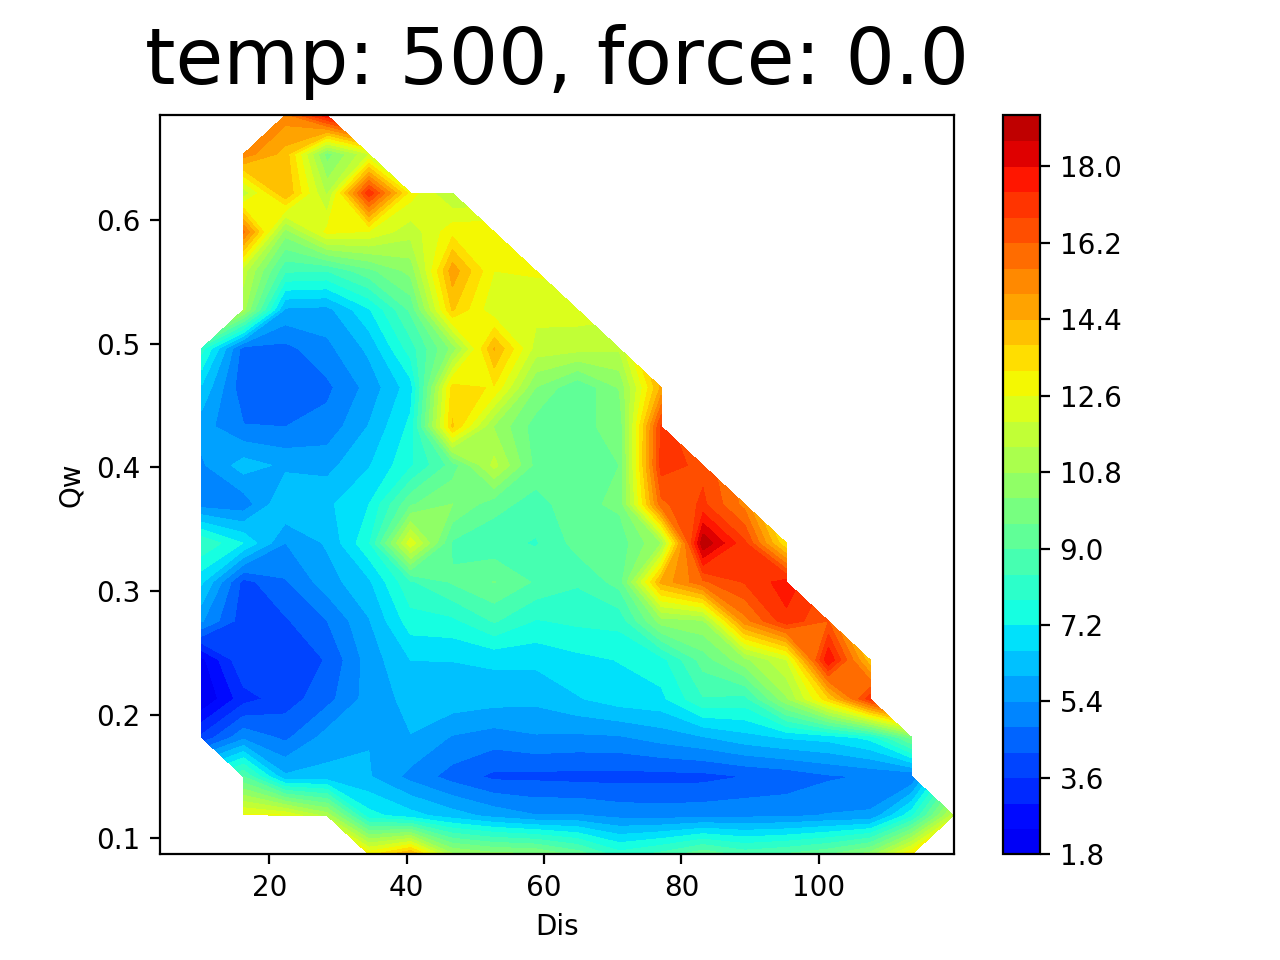

In [45]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "Qw"
y_axis = "Dis"
force = 0.0
temp = 500
name_convertion_dic = {"averageZ":"z", "Qw":"qw", "Dis":"dis"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=y_axis, ylabel=x_axis, title=title)

<IPython.core.display.Javascript object>


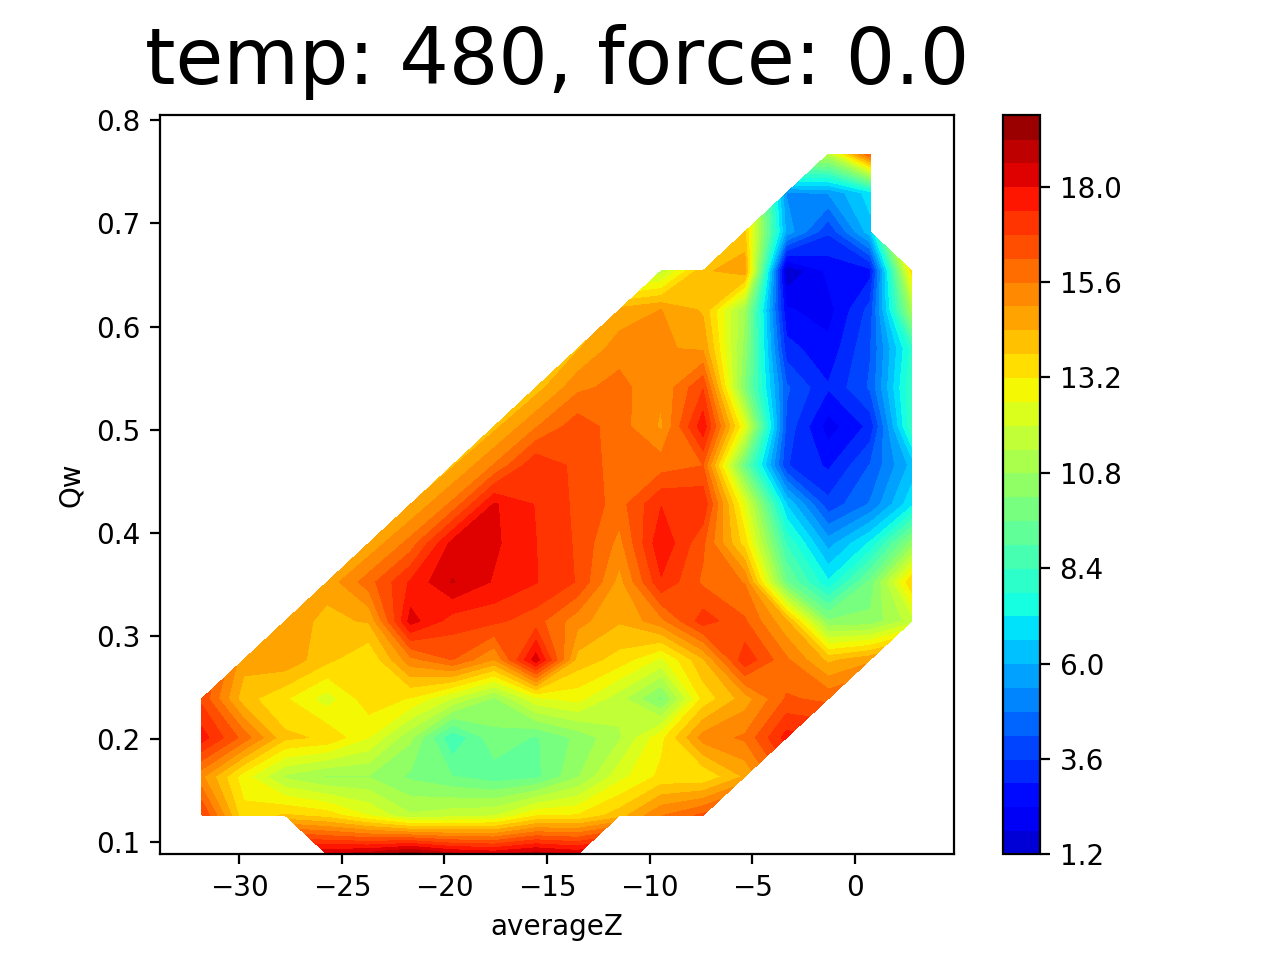

In [86]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 480
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title, zmax=20)

<IPython.core.display.Javascript object>


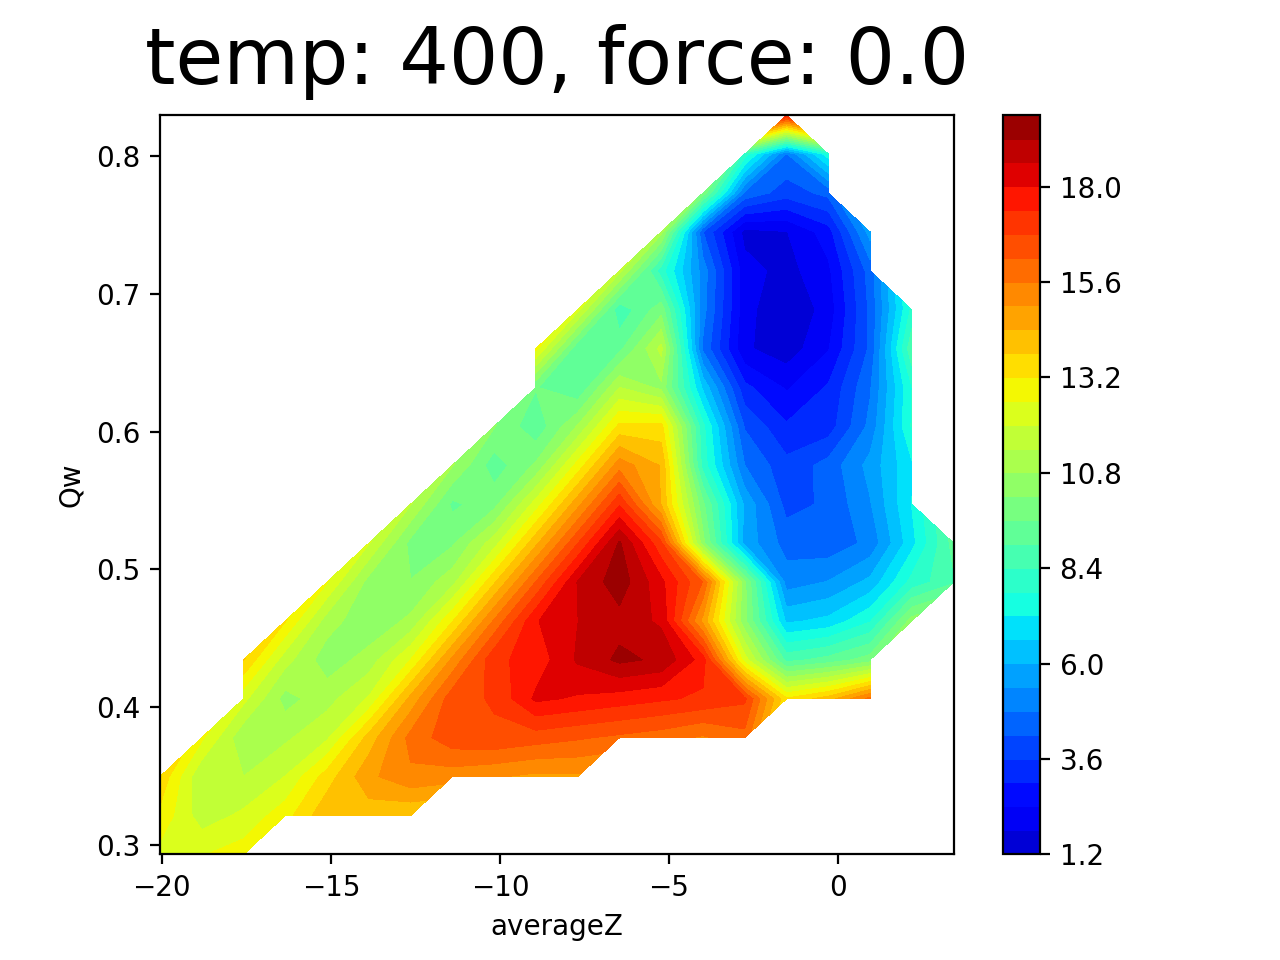

In [48]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


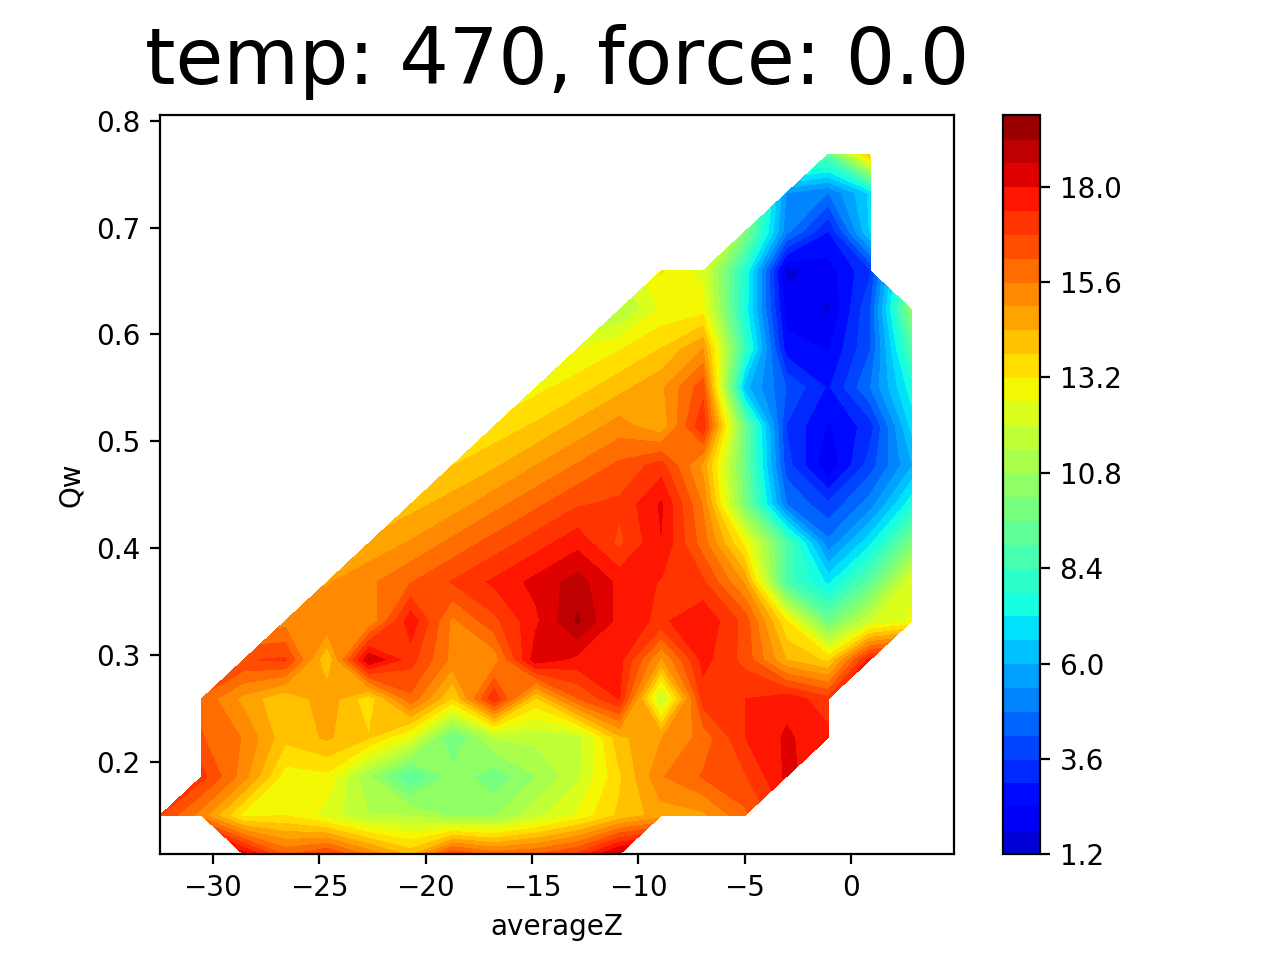

In [52]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 470
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


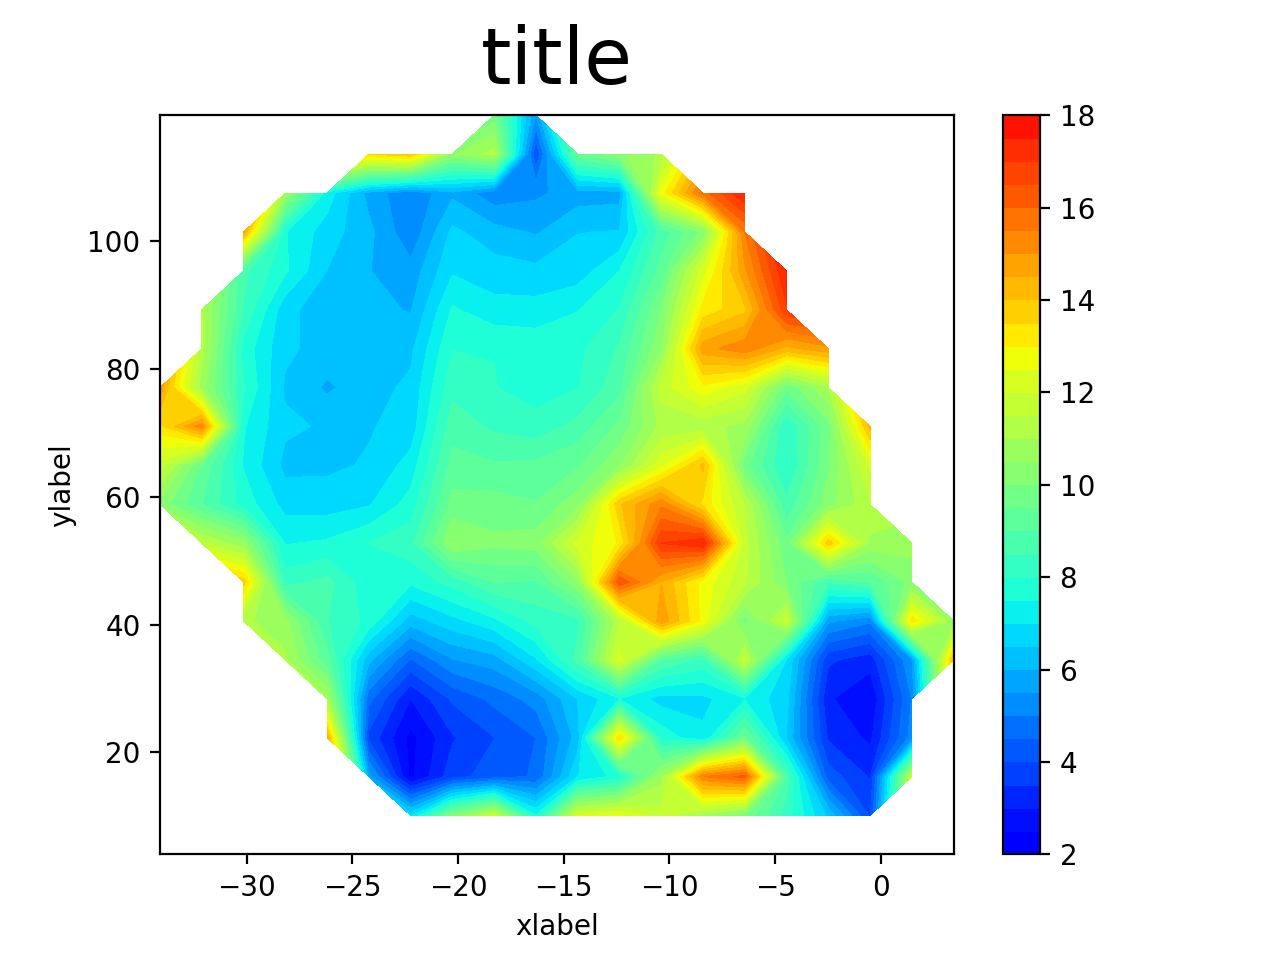

In [16]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_z_dis/force_0.1/"
plot2d(location, temp=400)

<IPython.core.display.Javascript object>


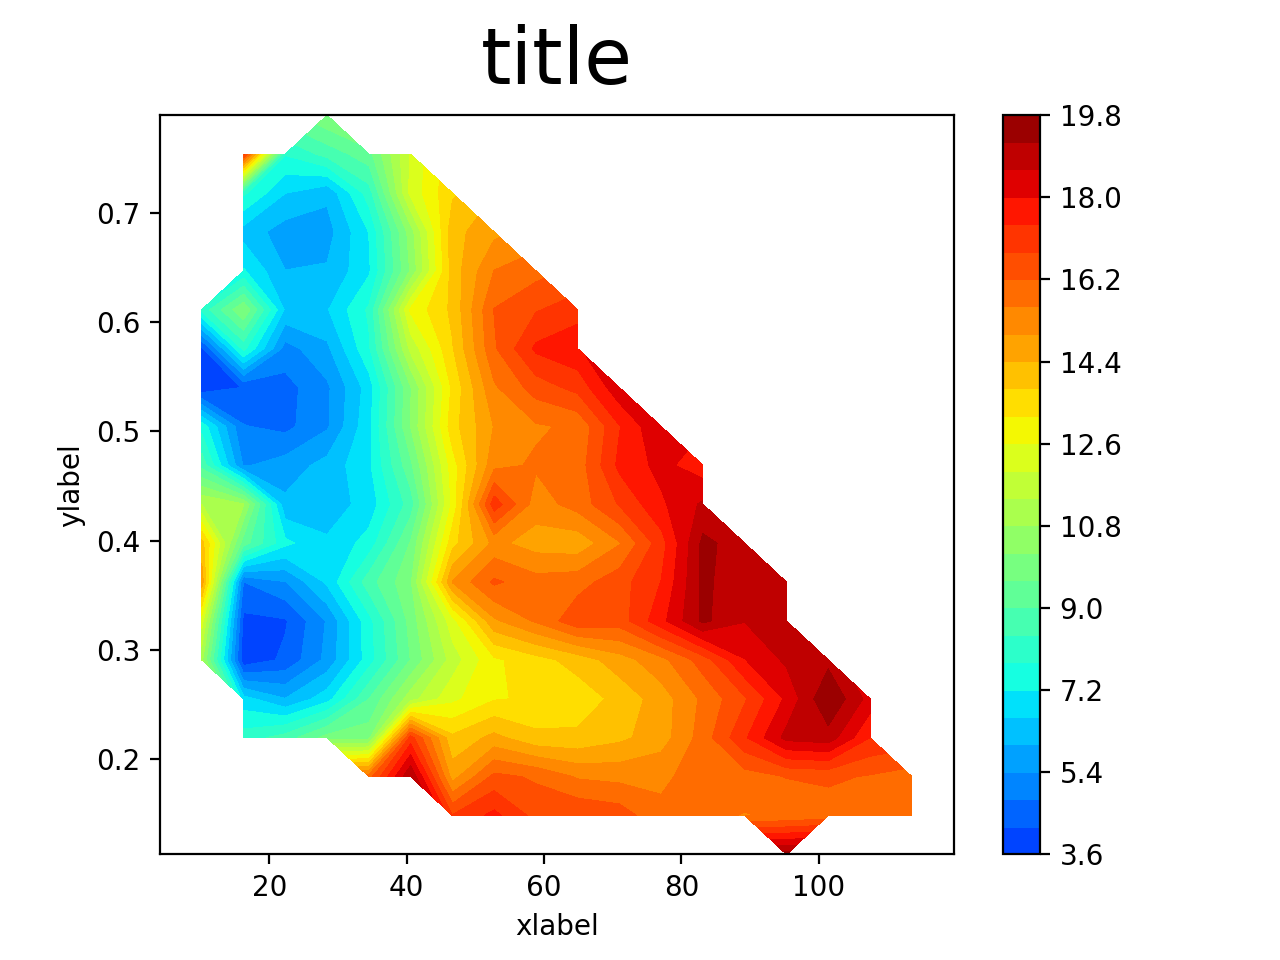

In [6]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_qw_dis/force_0.0/"
plot2d(location, temp=400)

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
# plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-410.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.1/"
filename = location + "pmf-400.dat"
xmin, xmax = -40, 10
ymin, ymax = 0, 150
zmin, zmax = 0, 20
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_qw_dis/force_0.0/"
filename = location + "pmf-450.dat"
xmin, xmax = 0, 120
ymin, ymax = 0, 1
zmin, zmax = 0, 20

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
np.loadtxt(filename).shape